# Visualization

###### WeRateDog Dataset visualization after cleaning original dataset.

In [4]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
import json
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
merged_df_clean = pd.read_csv('merged_df_visual.csv')

#### What is  the correlation between Retweets & Favorite Counts

It would be great to see is there a relationship between tweet's favorite counts and its retweet status. 

Does more retweets result in higher favorite?

Text(0.5,0.98,'correlation between the retweet & favorite counts')

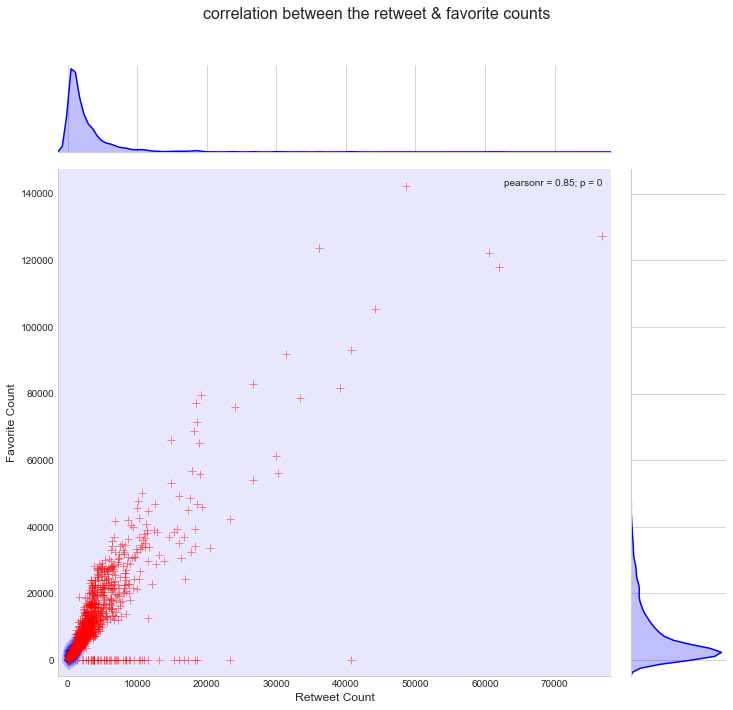

In [7]:
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=merged_df_clean, 
                  color="blue",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="red",
             s=80, 
             linewidth=1, 
             marker="",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

g.fig.subplots_adjust(top=0.9)
plt.suptitle('correlation between the retweet & favorite counts',
                 fontsize=16)

* From the scatter plot of retweet_count and favorite_count, it can be said that there is a strong correlation between them.
* As the correlation map shows if the count of retweet is high the count of favorites goes to high
* It is seen that intensity is below 500 retweet.

#### Prefered Dog Gender

WeRateDog dataset includes more that 2000 information about dogs rating on Twitter. Dog gender distribution on the dataset is worth to see. And idog gender effect on rating system can be analyzed by looking the distribution of that gender. 

Text(0.5,0.98,'Dog Gender Distribution')

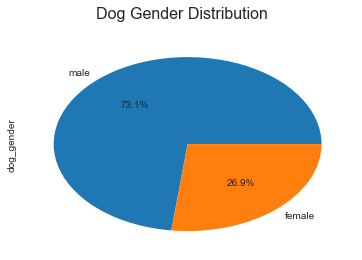

In [9]:
merged_df_clean[merged_df_clean['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.suptitle('Dog Gender Distribution',
                 fontsize=16)

Text(0,0.5,'rating numerator')

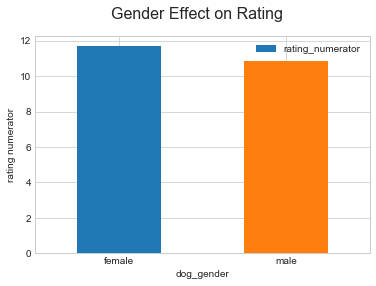

In [11]:
df = merged_df_clean[['dog_gender', 'rating_numerator']][merged_df_clean.dog_gender.notnull()].groupby('dog_gender').mean()
ax = df.plot.bar( y='rating_numerator', rot=0)
plt.suptitle('Gender Effect on Rating',
                 fontsize=16)

ax.set_ylabel("rating numerator")

* Male dog is prefered more than female dogs.
* Male dog population in WeRateDogs is more than 50%. 
* However when rating is investigated, it is seen that gender has not much effect on it. 

#### Famous Dog Stage

Most preferred dog stage in WeRateDogs is shown as a Pie Chart. At the next step, rating based on dog stage can be seen from BoxPlot. 

Boxplot can provide distribution of a variable according to decided rating factor. Therefore it would be great to see dog stage effect on rating.

(-1.2885797396652512,
 1.2370867742795675,
 -1.2200463336826606,
 1.2100248595007976)

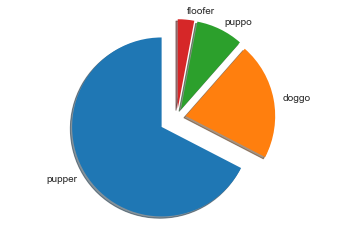

In [12]:
dog_stage_count = list(merged_df_clean[merged_df_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = merged_df_clean[merged_df_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal') 

Text(0.5,0.98,'BoxPlot of DogStage based on Rating')

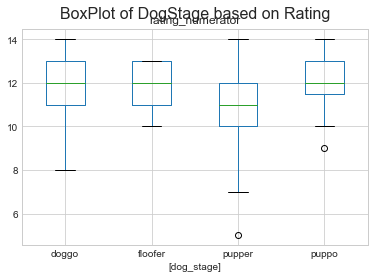

In [9]:
merged_df_clean[merged_df_clean['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])

plt.suptitle('BoxPlot of DogStage based on Rating',
                 fontsize=16)

Above, boxplot of dog stage is performed with respect to rating numerator. 
From boxplot, 
* pupper has the lowest mean rating.
* doggo,floofer and puppo have nearly same mean rating.

Mean values of dog stages are;

In [3]:
merged_df_clean[merged_df_clean['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.982456
floofer    11.875000
pupper     10.930055
puppo      12.000000
Name: rating_numerator, dtype: float64

#### Conclusion

The Twitter account WeRateDogs is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated according to their poses/cuteness level. 

If your concern is  getting higher rating, maybe choosing a female floofer can help.